#**Código de honor**

Al entregar la solución de este parcial, yo, **Ana Sofía Medina Martínez** con código **202416921** me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial

#**Contexto**

El Objetivo de Desarrollo Sostenible (ODS) número 15 de la Organización de las Naciones Unidas
(ONU) se enfoca en la "Vida de los Ecosistemas Terrestres", con la intención de proteger, restaurar
y fomentar el uso responsable de dichos ecosistemas. Este objetivo aborda la gestión sostenible de
los bosques, la lucha contra la desertificación, la detención e inversión de la degradación de las
tierras y la preservación de la biodiversidad.
Ante este panorama, EcoAlpes ha decidido llevar a cabo una serie de experimentos centrados en
las plantas para estudiar cómo fenómenos como el cambio climático pueden impactar en los
ecosistemas. En este contexto, la organización ha reconocido la oportunidad de analizar la
información existente sobre experimentos sobre plantas y evaluar si el empleo de análisis de datos
con técnicas de aprendizaje automático puede contribuir al logro de dicho objetivo.
EcoAlpes ha optado por contratarlo, con el propósito de utilizar el conjunto de datos compartidos
para avanzar en el desarrollo de proyectos relacionados con esta iniciativa.


Objetivo: comprender cómo diferentes condiciones afectan la ocurrencia de eventos en las plantas

# **0. Importación de librerías**

In [1]:
!pip install pandas
!pip install ydata-profiling
!pip install scikit-learn
!pip install sklearn_features
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d9ba342bd406223b7acf93f8fcb0cd16d2c203a13034222f1898769788b42c95
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
import requests

from ydata_profiling import ProfileReport

from sklearn.metrics import accuracy_score # Cálculo de la precisión
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.model_selection import train_test_split # División de datos en entrenamiento y prueba
from sklearn.model_selection import GridSearchCV # Búsqueda de hiperparámetros

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler # Estandarización de datos

from sklearn.metrics import classification_report, accuracy_score # Reporte de clasificación y precisión
from sklearn.svm import SVC # Máquina de soporte vectorial
from sklearn.ensemble import RandomForestClassifier #Librería para manejo del algoritmo Random Forest

from PIL import Image #Librería para brir, manipular y guardar muchos formatos diferentes de archivos de imágenes.

from skimage import io
from zipfile import ZipFile
from io import BytesIO


# **1. Carga y entendimiento de datos**

In [119]:
#data = pd.read_csv('https://raw.githubusercontent.com/sofiapapadron/Inteligencia-de-Negocios/main/Simulacro%20Examen%201/Datos_pacientes_etapa1.csv', delimiter=';')
data = pd.read_csv('https://raw.githubusercontent.com/sofiapapadron/Inteligencia-de-Negocios/main/Ex%C3%A1men%201/Tree_Data.csv', delimiter=',')
data.head()

,No,Species,Light,Microbe,Adult,Bench,Harvest,Time,Event,AMFCount,AMFIntersections,AMF,Phenolics,NSC,Lignin,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
0,8,Acsa,Low,Combined,6.0,1,3.0,21,0,38.0,69.0,55.07,-0.05,NaN,9.11,55.07,-0.05,5.64,9.11
1,10,Acru,Low,Combined,3.0,1,3.0,21,0,27.0,75.0,36.00,-0.01,NaN,4.66,36.00,-0.01,6.37,4.66
2,22,Acne,Low,Combined,10.0,1,NaN,22,1,NaN,NaN,NaN,NaN,NaN,NaN,64.93,0.03,7.65,8.34
3,23,Acne,Low,Combined,11.0,1,9.0,63,0,71.0,100.0,71.00,0.00,NaN,9.87,71.00,0.00,8.02,9.87
4,32,Acsa,Low,Combined,6.0,1,6.0,42,0,62.0,100.0,62.00,0.13,NaN,14.51,62.00,0.13,11.11,14.51


In [120]:
#ProfileReport(data)

La elección de la *event* como variable de interés sugiere que EcoAlpes está particularmente interesado en comprender cómo diferentes condiciones afectan la ocurrencia de eventos en las plantas.




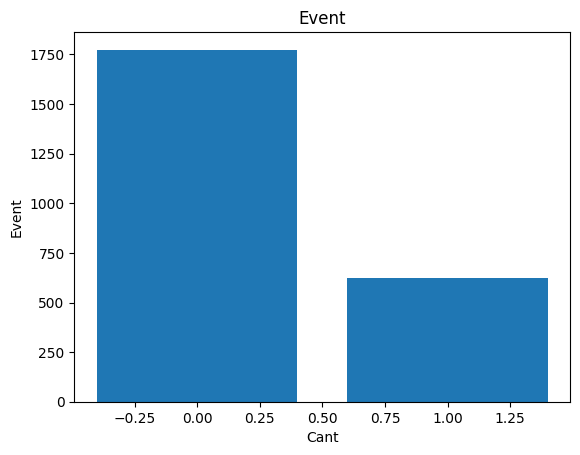

In [121]:
plt.bar(data['Event'].unique(),data['Event'].value_counts())
plt.title('Event')
plt.xlabel('Cant')
plt.ylabel('Event')
plt.show()

# **2. Preparación de datos**

Eliminación de variables con valor único

In [122]:
data = data.drop('No', axis=1)
data.head()

,Species,Light,Microbe,Adult,Bench,Harvest,Time,Event,AMFCount,AMFIntersections,AMF,Phenolics,NSC,Lignin,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
0,Acsa,Low,Combined,6.0,1,3.0,21,0,38.0,69.0,55.07,-0.05,NaN,9.11,55.07,-0.05,5.64,9.11
1,Acru,Low,Combined,3.0,1,3.0,21,0,27.0,75.0,36.00,-0.01,NaN,4.66,36.00,-0.01,6.37,4.66
2,Acne,Low,Combined,10.0,1,NaN,22,1,NaN,NaN,NaN,NaN,NaN,NaN,64.93,0.03,7.65,8.34
3,Acne,Low,Combined,11.0,1,9.0,63,0,71.0,100.0,71.00,0.00,NaN,9.87,71.00,0.00,8.02,9.87
4,Acsa,Low,Combined,6.0,1,6.0,42,0,62.0,100.0,62.00,0.13,NaN,14.51,62.00,0.13,11.11,14.51


In [123]:
print(data)

     Species Light   Microbe  Adult  Bench  Harvest  Time  Event  AMFCount  \
0       Acsa   Low  Combined    6.0      1      3.0    21      0      38.0   
1       Acru   Low  Combined    3.0      1      3.0    21      0      27.0   
2       Acne   Low  Combined   10.0      1      NaN    22      1       NaN   
3       Acne   Low  Combined   11.0      1      9.0    63      0      71.0   
4       Acsa   Low  Combined    6.0      1      6.0    42      0      62.0   
...      ...   ...       ...    ...    ...      ...   ...    ...       ...   
2395    Acru  High      None    3.0      6      NaN    63      1       NaN   
2396    Acru  High      None    1.0      6      NaN    63      1       NaN   
2397    Acne  High      None    9.0      6      6.0    42      0       NaN   
2398    Acne  High      None    9.0      6      9.0    63      0       NaN   
2399    Acsa  High      None    6.0      6      NaN    63      1       NaN   

      AMFIntersections    AMF  Phenolics    NSC  Lignin  AMF_Im

In [124]:
print(data.columns)

Index(['Species', 'Light', 'Microbe', 'Adult', 'Bench', 'Harvest', 'Time',
       'Event', 'AMFCount', 'AMFIntersections', 'AMF', 'Phenolics', 'NSC',
       'Lignin', 'AMF_Imp', 'PHN_Imp', 'NSC_Imp', 'LIG_Imp'],
      dtype='object')


In [125]:
# División en conjunto de entrenamiento y prueba
X = data.drop('Event', axis=1)
y = data['Event']

In [126]:
data.shape

(2400, 18)

In [127]:
y.shape

(2400,)

In [128]:
X.shape

(2400, 17)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


Definición de columnas numéricas y categóricas

In [131]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_features


Index(['Adult', 'Bench', 'Harvest', 'Time', 'Event', 'AMFCount',
       'AMFIntersections', 'AMF', 'Phenolics', 'NSC', 'Lignin', 'AMF_Imp',
       'PHN_Imp', 'NSC_Imp', 'LIG_Imp'],
      dtype='object')

In [132]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['Species', 'Light', 'Microbe'], dtype='object')

Existen muchas variables en los datos que están altamente correlacionadas entre sí, el uso de PCA se justifica por su capacidad de poder reducir la multicolinealidad

In [155]:
# Construcción del pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('correlation_reduction', PCA(n_components=0.95))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Adult', 'Bench', 'Harvest', 'Time', 'AMFCount',
                                      'AMFIntersections', 'AMF', 'Phenolics', 'NSC',
                                      'Lignin', 'AMF_Imp', 'PHN_Imp', 'NSC_Imp', 'LIG_Imp']),
        ('cat', categorical_transformer, ['Species', 'Light', 'Microbe'])
    ])

# 3. Modelamiento

In [156]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('correlation_reduction',
                                                                   PCA(n_components=0.95))]),
                                                  ['Adult', 'Bench', 'Harvest',
                                                   'Time', 'AMFCount',
                                                   'AMFIntersections', 'AMF',
                                                   'Phenolics', 'NSC', 'Lignin',
                                                   'AMF_Imp', 'PHN_Imp',
                                                   'NSC_Imp', 'LIG_Imp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Species', 'Light',
                                                   'Microbe'])])),
                ('classifier', RandomForestClassifier())])

In [157]:
y_train.shape

(1920,)

In [158]:
X_train.shape

(1920, 17)

In [159]:
X_test.shape

(480, 17)

In [160]:
print(pipeline.steps)

[('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('correlation_reduction',
                                                  PCA(n_components=0.95))]),
                                 ['Adult', 'Bench', 'Harvest', 'Time',
                                  'AMFCount', 'AMFIntersections', 'AMF',
                                  'Phenolics', 'NSC', 'Lignin', 'AMF_Imp',
                                  'PHN_Imp', 'NSC_Imp', 'LIG_Imp']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['Species', 'Light', 'Microbe'])])), ('classifier', RandomForestClassifier())]


In [161]:
# Entrenamiento del modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('correlation_reduction',
                                                                   PCA(n_components=0.95))]),
                                                  ['Adult', 'Bench', 'Harvest',
                                                   'Time', 'AMFCount',
                                                   'AMFIntersections', 'AMF',
                                                   'Phenolics', 'NSC', 'Lignin',
                                                   'AMF_Imp', 'PHN_Imp',
                                                   'NSC_Imp', 'LIG_Imp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Species', 'Light',
                                                   'Microbe'])])),
                ('classifier', RandomForestClassifier())])

In [163]:
pipeline.fit(X_train, y_train).score(X_test, y_test)

0.925